# Housing Price Predictions with Melbourne Housing Dataset

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import joblib 

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet

## Project Definition

#### Veri kümesi
Melbourne, Avustralya'nın Victoria eyaletinin başkenti ve en büyük şehridir ve hem Avustralya'nın hem de Okyanusya'nın en kalabalık ikinci şehridir. Veri seti, Melbourne'deki evlerin çeşitli özelliklerini ve fiyatlarını içermektedir.

- Melbourne'da konut fiyatları 2017'de zirveye ulaştı, ancak 2019'da büyük bir düşüş yaşadı. Theguardian.com'da yayınlanan bir makale, bu durumun bir fiyat balonunun düzeltilmesi olduğunu öne sürüyor.
- Bu projede ev fiyatlarını tahmin etmek için makine öğrenmesi modellerini kullanacağız. Eğitim verilerimiz, evlerin farklı özelliklerine ve satış fiyatlarına ilişkin bilgiler içeriyor.
- Hedef(target) değişkenimiz "Price" olarak seçilir.

#### Get The Data

The variables in the data set:

* Suburb (Kenar mahalle)
* Address
* Rooms: Oda sayısı
* Price: Avustralya doları cinsinden fiyat -> "target variable"
* Method: 
    - S - property sold; (satılan mülk) 
    - SP - property sold prior; (daha önce satılan mülk;)
    - PI - property passed in; (aktarılan mülk)
    - PN - sold prior not disclosed; (açıklanmadan önce satıldı)
    - SN - sold not disclosed; (satıldığı açıklanmadı)
    - NB - no bid; (teklif yok)
    - VB - vendor bid; (satıcı teklifi)
    - W - withdrawn prior to auction; (açık artırmadan önce geri çekilmiş)
    - SA - sold after auction; (açık artırmadan sonra satılır)
    - SS - sold after auction price not disclosed. (açık artırmadan sonra satılan fiyat açıklanmadı)
    - N/A - price or highest bid not available. (fiyat veya en yüksek teklif mevcut değil)
* Type: 
    - br - bedroom(s); 
    - h - house,cottage,villa,semi,terrace; 
    - u - unit, duplex; 
    - t - townhouse; 
    - dev site - development site; 
    - o res - other residential.
* SellerG: Emlakçı
* Date: Satış tarihi
* Distance: Kilometre Cinsinden CBD'ye Uzaklık
* Bedroom2 : Scraped of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Araç park yeri sayısı
* Landsize: Metre Cinsinden Arazi Büyüklüğü
* BuildingArea: Metre cinsinden Bina Boyutu
* YearBuilt: Evin inşa edildiği yıl
* CouncilArea: Bölge için yönetim konseyi
* Lattitude (Enlem)
* Longtitude (Boylam)
* Regionname: Genel Bölge (West, North West, North, North east ...etc)
* Propertycount: Kenar mahallede(suburb) bulunan mülklerin sayısı

## Gathering and Observing Data

#### Load The Dataset

In [3]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
train = df.copy()
print(train)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.

In [4]:
train.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

#### Find the shape, number of columns and size of the dataset

In [5]:
print(f'Shape     : {train.shape}\n' # Number of Rows, Columns
      f'Size      : {train.size}\n') # Size of data
#       f'Dimension : {train.ndim})'

Shape     : (34857, 21)
Size      : 731997



In [6]:
# Train Veri setindeki değişken ve gözlem sayısı
print("Gözlem sayısı : " ,len(train))
print("Değişken sayısı : ", len(train.columns))

Gözlem sayısı :  34857
Değişken sayısı :  21


Veri setimizde 21 sütun bulunmaktadır. Modelleri eğitmek için training olarak 34857 örnek kullanacağız.

#### Information of The Dataset

In [7]:
# Display the data types, memory usage, range index, and number of non-null cells in each column
info = train.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Veri seti küçüktür, object (kategorik olarak dönüştürülecek) ve sayısal değişkenlerin bir karışımını içerir. "Date" değişkenimiz object olduğu için daha sonra Datetime Convertion yapılması gerekir.

Veri setimizi daha iyi anlamak ve gelecekteki analizlerimizi doğru bir şekilde yönlendirebilmek için veri setinin detaylı bir incelemesini keşifsel veri analizi yöntemleri kullanarak inceleyelim. 

## EDA (Exploratory Data Analysis)

In [8]:
cat_cols = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
num_cols = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

#### DescriptiveStatistics of Dataset

In [9]:
# Select the columns and convert object columns to categorical
train[cat_cols] = train[cat_cols].astype('category')

In [10]:
train

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

In [11]:
# Datetime convertion
train['Date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y")
train.reset_index(drop=True, inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [13]:
# Summary Statistics
train.describe().T

count                           mean                  min  \
Rooms          34857.0                       3.031012                  1.0   
Price          27247.0                 1050173.344955              85000.0   
Date             34857  2017-05-23 11:01:38.838109696  2016-01-28 00:00:00   
Distance       34856.0                      11.184929                  0.0   
Postcode       34856.0                    3116.062859               3000.0   
Bedroom2       26640.0                       3.084647                  0.0   
Bathroom       26631.0                       1.624798                  0.0   
Car            26129.0                       1.728845                  0.0   
Landsize       23047.0                     593.598993                  0.0   
BuildingArea   13742.0                       160.2564                  0.0   
YearBuilt      15551.0                    1965.289885               1196.0   
Lattitude      26881.0                     -37.810634            -38.19043   
Longtitude     26881.0                     145.001851            144.42379   
Propertycount  34854.0                    7572.888306                 83.0   

                               25%                  50%                  75%  \
Rooms                          2.0                  3.0                  4.0   
Price                     635000.0             870000.0            1295000.0   
Date           2016-11-19 00:00:00  2017-07-08 00:00:00  2017-10-28 00:00:00   
Distance                       6.4                 10.3                 14.0   
Postcode                    3051.0               3103.0               3156.0   
Bedroom2                       2.0                  3.0                  4.0   
Bathroom                       1.0                  2.0                  2.0   
Car                            1.0                  2.0                  2.0   
Landsize                     224.0                521.0                670.0   
BuildingArea                 102.0                136.0                188.0   
YearBuilt                   1940.0               1970.0               2000.0   
Lattitude                -37.86295             -37.8076             -37.7541   
Longtitude                144.9335             145.0078             145.0719   
Propertycount               4385.0               6763.0              10412.0   

                               max            std  
Rooms                         16.0       0.969933  
Price                   11200000.0  641467.130105  
Date           2018-03-17 00:00:00            NaN  
Distance                      48.1       6.788892  
Postcode                    3978.0     109.023903  
Bedroom2                      30.0        0.98069  
Bathroom                      12.0       0.724212  
Car                           26.0       1.010771  
Landsize                  433014.0    3398.841946  
BuildingArea               44515.0      401.26706  
YearBuilt                   2106.0      37.328178  
Lattitude                 -37.3902       0.090279  
Longtitude               145.52635       0.120169  
Propertycount              21650.0    4428.090313

* *Bir evin fiyat aralığı oldukça geniş, 85 bin ile 11.2 milyon dolar arasındadır.*
* *Şehir merkezine uzaklık bazen 0'dır.*
* *Bazı evlerde yatak odası ya da banyo yoktur.*
* *Bazı evlerin LandSize(arsa büyüklüğü) ve BuildingArea(inşaat alanı) sıfırdır (bunlar daire olabilir). Bu değişkenlerde bazı aykırı değerlerin olduğu görülmektedir.*

#### Duplicate Values

In [14]:
train.duplicated().sum()

1

In [15]:
train.loc[train.duplicated(keep=False), :]

Suburb        Address  Rooms Type  Price Method SellerG       Date  \
15857  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis 2017-06-17   
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis 2017-06-17   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
15857      15.4    3131.0  ...       3.0  2.0     405.0         226.0   
15858      15.4    3131.0  ...       3.0  2.0     405.0         226.0   

       YearBuilt              CouncilArea Lattitude  Longtitude  \
15857     2000.0  Manningham City Council -37.82678   145.16777   
15858     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15857  Eastern Metropolitan        4973.0  
15858  Eastern Metropolitan        4973.0  

[2 rows x 21 columns]

1 adet veri tekrar etmiştir. Bu yüzden bu veriyi silebiliriz.

In [16]:
# Delete duplicates
train.drop_duplicates(inplace=True)

#### Distributions/Imbalances in The Data Set

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

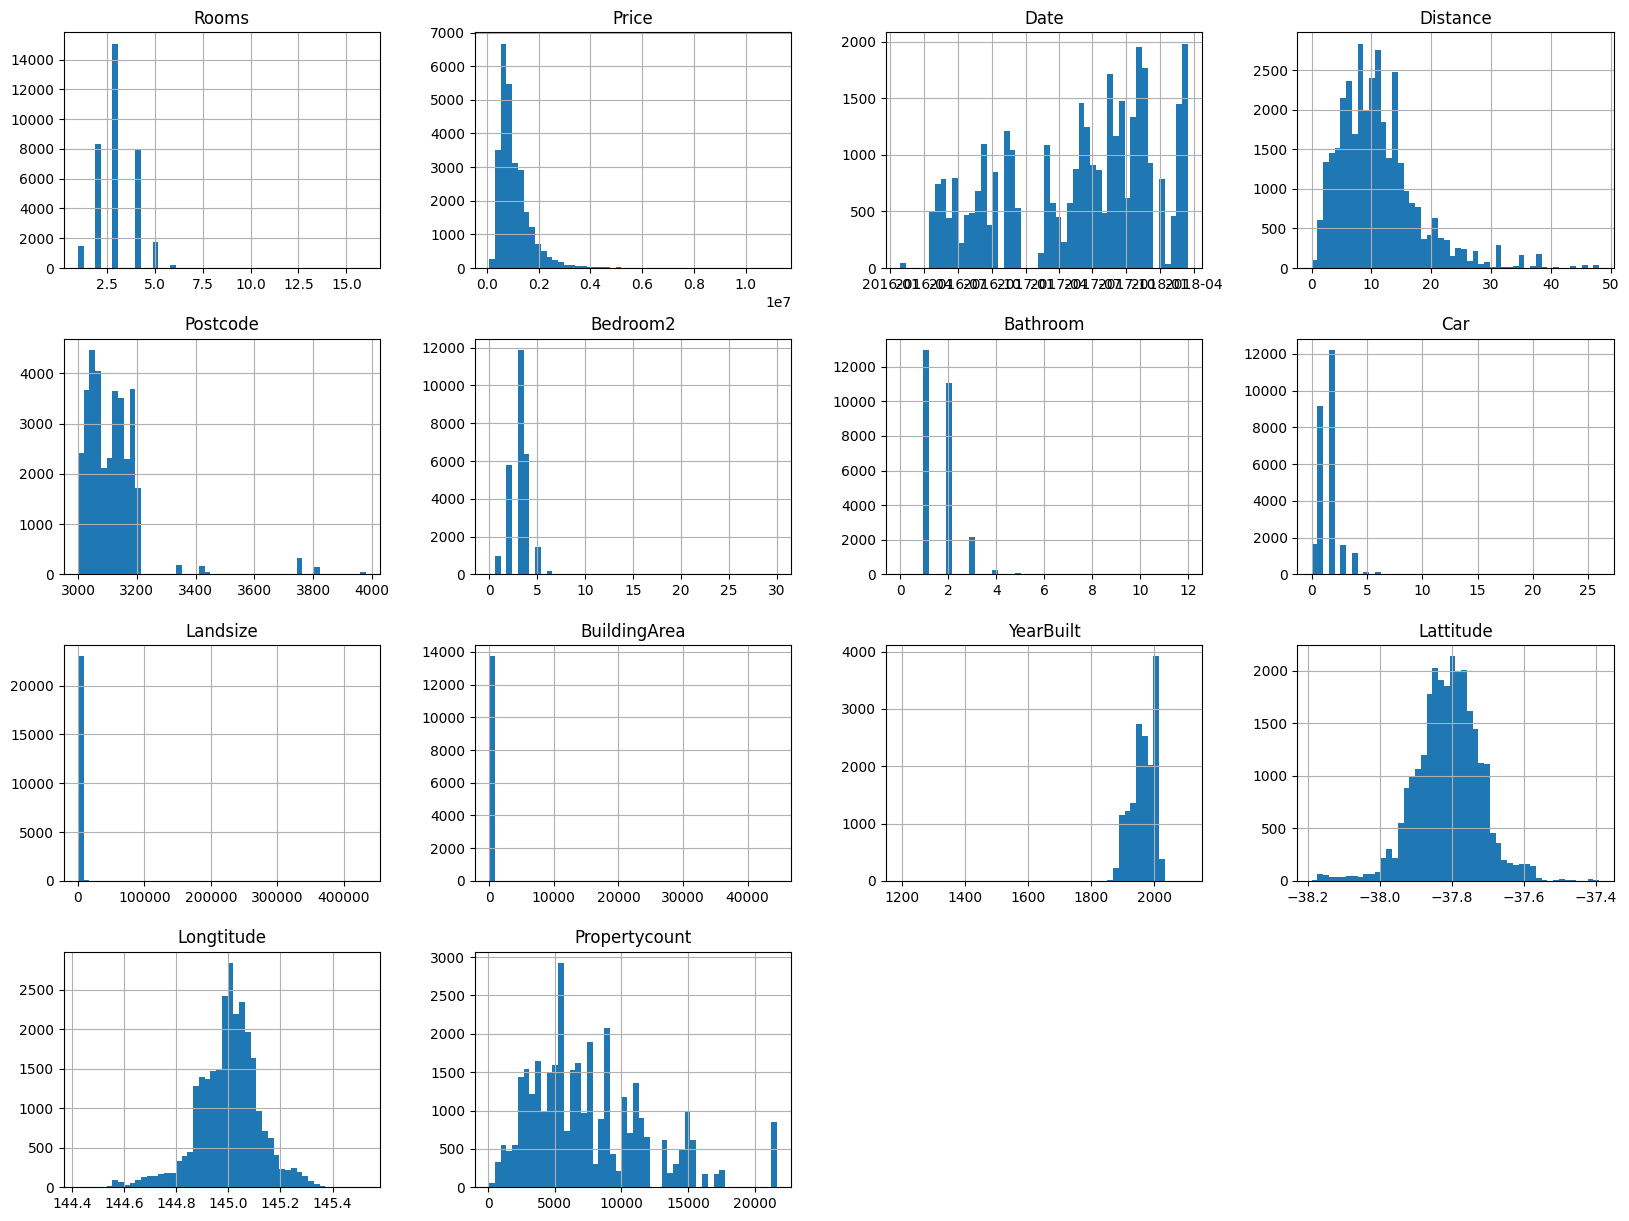

In [17]:
train.hist(bins=50, figsize=(20,15))

* *Birçok evin BuildingArea (bina boyutu) sıfırdır (yaklaşık %50).*
* *Çoğu ev şehir merkezinin 20 kilometre distance (yakınında) görünüyor.*
* *Hemen hemen tüm evlerde LandSize(arsa büyüklüğü) sıfırdır.*
* *Price değişkeni biraz çarpıktır.*

In [18]:
train.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

"Date" ve "Price" sütunlarını (axis=1) çıkartarak ve bir kutu grafiği çizdirelim. Bağımsız değişkenler içinde aykırı değerleri görebiliriz.

              Rooms      Distance      Postcode      Bedroom2      Bathroom  \
count  34856.000000  34855.000000  34855.000000  26639.000000  26630.000000   
mean       3.031013     11.184808   3116.062430      3.084650      1.624747   
std        0.969947      6.788952    109.025437      0.980708      0.724177   
min        1.000000      0.000000   3000.000000      0.000000      0.000000   
25%        2.000000      6.400000   3051.000000      2.000000      1.000000   
50%        3.000000     10.300000   3103.000000      3.000000      2.000000   
75%        4.000000     14.000000   3156.000000      4.000000      2.000000   
max       16.000000     48.100000   3978.000000     30.000000     12.000000   

                Car       Landsize  BuildingArea     YearBuilt     Lattitude  \
count  26128.000000   23046.000000  13741.000000  15550.000000  26880.000000   
mean       1.728835     593.607177    160.251616   1965.287653    -37.810634   
std        1.010789    3398.915462    401.281270

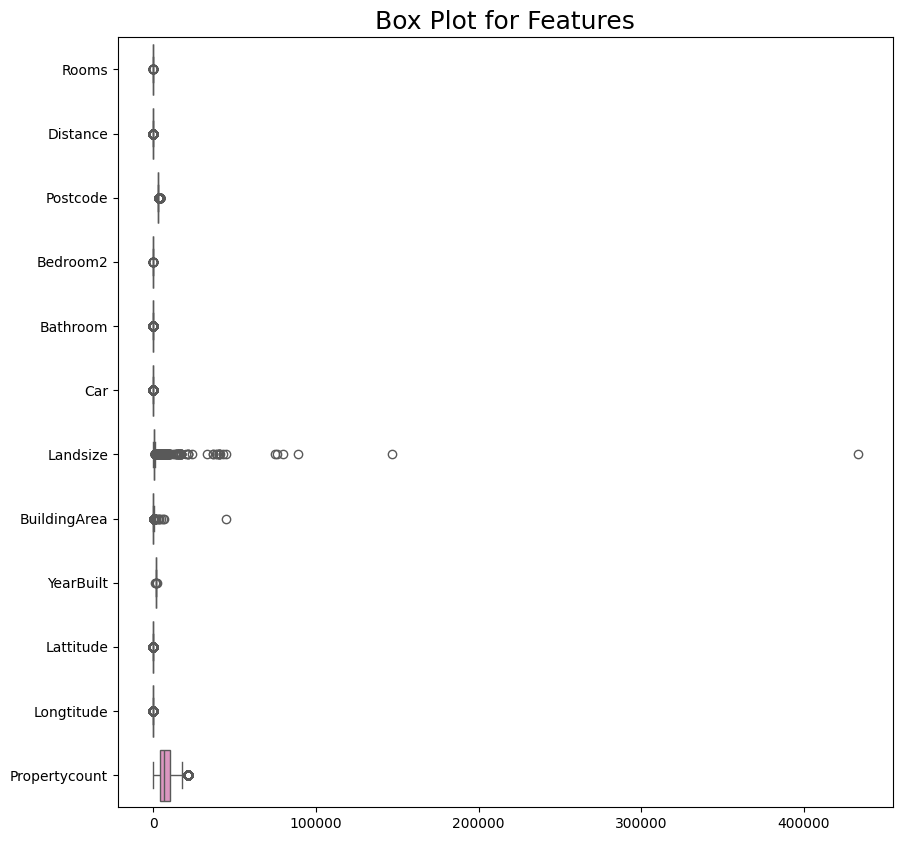

In [19]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=train.drop(['Date', 'Price'],axis=1), orient="h", palette="Set2")
print(train.drop(['Date', 'Price'],axis=1).describe())

#### Remove Outliers using Z-score Method

C:\Users\Seher\AppData\Local\Temp\ipykernel_16112\3310010921.py:19: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(y="Price", data=train, inner="quartile", bw=0.2)


<Axes: ylabel='Price'>

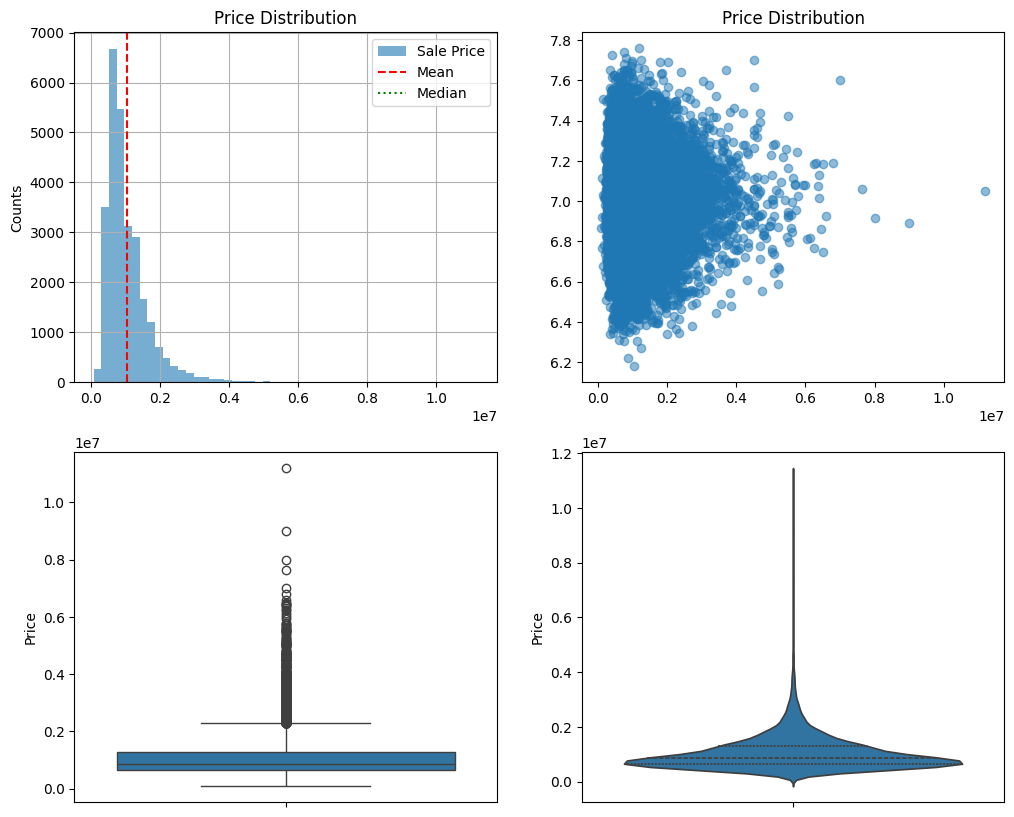

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
train['Price'].hist(bins=50, label='Sale Price', alpha=0.6)
plt.axvline(np.mean(train['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(train['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(train['Price'], np.random.normal(7, 0.2, size=train.shape[0]), alpha=0.5)
plt.title("Price Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="Price", data=train)

plt.subplot(2, 2, 4)
sns.violinplot(y="Price", data=train, inner="quartile", bw=0.2)

In [21]:
z_score_threshold = 3

# Assuming 'train' is your DataFrame and 'num_cols' is a list of numeric column names
# Make sure to replace 'num_cols' with the actual list of your numeric columns

# Create a mask to keep track of outliers
outliers_mask = pd.Series(False, index=train.index)

for col in num_cols:
    # Calculate the mean and standard deviation for the current column
    col_mean = train[col].mean()
    col_std = train[col].std()
    
    # Calculate z-scores for the column
    z_scores = np.abs((train[col] - col_mean) / col_std)
    
    # Identify and print the number of outliers based on the z-score threshold
    outliers = z_scores > z_score_threshold
    outlier_count = outliers.sum()
    
    print(f"Column: {col}")
    print(f"Mean: {col_mean}, Standard Deviation: {col_std}")
    print(f"Number of outliers: {outlier_count}")
    
    # Update the outliers_mask to include the outliers for the current column
    outliers_mask = outliers_mask | outliers

# Use the outliers_mask to filter the DataFrame and keep only non-outliers
df_cleaned = train[~outliers_mask]

# Optional: Reset the index for the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

Column: Rooms
Mean: 3.031013311911866, Standard Deviation: 0.9699468344008803
Number of outliers: 269
Column: Distance
Mean: 11.184808492325347, Standard Deviation: 6.788952302101401
Number of outliers: 792
Column: Postcode
Mean: 3116.062430067422, Standard Deviation: 109.02543738145582
Number of outliers: 558
Column: Bedroom2
Mean: 3.0846503247118884, Standard Deviation: 0.9807079989523899
Number of outliers: 73
Column: Bathroom
Mean: 1.6247465264739016, Standard Deviation: 0.7241765746395444
Number of outliers: 371
Column: Car
Mean: 1.7288349663196572, Standard Deviation: 1.0107887364846408
Number of outliers: 353
Column: Landsize
Mean: 593.607176950447, Standard Deviation: 3398.9154621822427
Number of outliers: 43
Column: BuildingArea
Mean: 160.25161587220725, Standard Deviation: 401.2812699804153
Number of outliers: 9
Column: YearBuilt
Mean: 1965.2876527331189, Standard Deviation: 37.3283404264358
Number of outliers: 9
Column: Lattitude
Mean: -37.81063369494048, Standard Deviation:

              Rooms      Distance      Postcode      Bedroom2      Bathroom  \
count  31841.000000  31840.000000  31840.000000  24124.000000  24115.000000   
mean       2.971986     10.343028   3102.035616      3.018281      1.574083   
std        0.912934      5.475142     60.316077      0.898278      0.638745   
min        1.000000      0.000000   3000.000000      1.000000      0.000000   
25%        2.000000      6.200000   3046.000000      2.000000      1.000000   
50%        3.000000      9.700000   3102.000000      3.000000      1.000000   
75%        4.000000     13.800000   3149.250000      4.000000      2.000000   
max        5.000000     31.200000   3427.000000      6.000000      3.000000   

                Car      Landsize  BuildingArea     YearBuilt     Lattitude  \
count  23639.000000  20941.000000  12349.000000  14054.000000  24341.000000   
mean       1.640679    498.330357    150.292086   1963.843390    -37.812687   
std        0.853216    548.196064     83.853248    

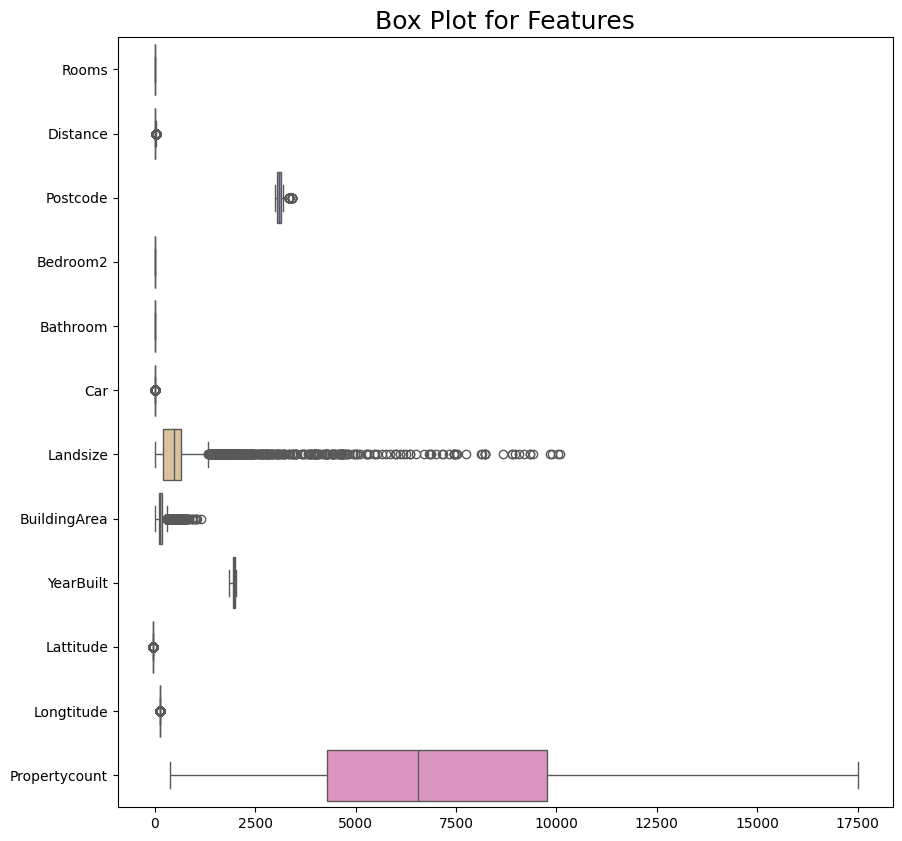

In [22]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=df_cleaned.drop(['Date', 'Price'],axis=1), orient="h", palette="Set2")
print(df_cleaned.drop(['Date', 'Price'],axis=1).describe())

In [23]:
outlier_columns = ['Landsize', 'BuildingArea']

In [24]:
z_score_threshold = 3

# Create a mask to keep track of outliers
outliers_mask = pd.Series(False, index=df_cleaned.index)

for col in outlier_columns:
    # Calculate the mean and standard deviation for the current column
    col_mean = df_cleaned[col].mean()
    col_std = df_cleaned[col].std()
    
    # Calculate z-scores for the column
    z_scores = np.abs((df_cleaned[col] - col_mean) / col_std)
    
    # Identify and print the number of outliers based on the z-score threshold
    outliers = z_scores > z_score_threshold
    outlier_count = outliers.sum()
    
    print(f"Column: {col}")
    print(f"Mean: {col_mean}, Standard Deviation: {col_std}")
    print(f"Number of outliers: {outlier_count}")
    
    # Update the outliers_mask to include the outliers for the current column
    outliers_mask = outliers_mask | outliers

# Use the outliers_mask to filter the DataFrame and keep only non-outliers
df_cleaned = df_cleaned[~outliers_mask]

# Optional: Reset the index for the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

Column: Landsize
Mean: 498.3303567164892, Standard Deviation: 548.1960636419797
Number of outliers: 241
Column: BuildingArea
Mean: 150.2920862984857, Standard Deviation: 83.85324848350939
Number of outliers: 147


              Rooms      Distance      Postcode      Bedroom2      Bathroom  \
count  31454.000000  31453.000000  31453.000000  23737.000000  23728.000000   
mean       2.973167     10.366487   3102.045783      3.020854      1.571477   
std        0.908761      5.467986     60.299042      0.892397      0.637235   
min        1.000000      0.000000   3000.000000      1.000000      0.000000   
25%        2.000000      6.200000   3046.000000      2.000000      1.000000   
50%        3.000000      9.700000   3102.000000      3.000000      1.000000   
75%        4.000000     13.800000   3150.000000      4.000000      2.000000   
max        5.000000     31.200000   3427.000000      6.000000      3.000000   

                Car      Landsize  BuildingArea     YearBuilt     Lattitude  \
count  23263.000000  20576.000000   12093.00000  13803.000000  23954.000000   
mean       1.640717    453.786936     145.61950   1963.494458    -37.812597   
std        0.853793    308.448477      67.79156    

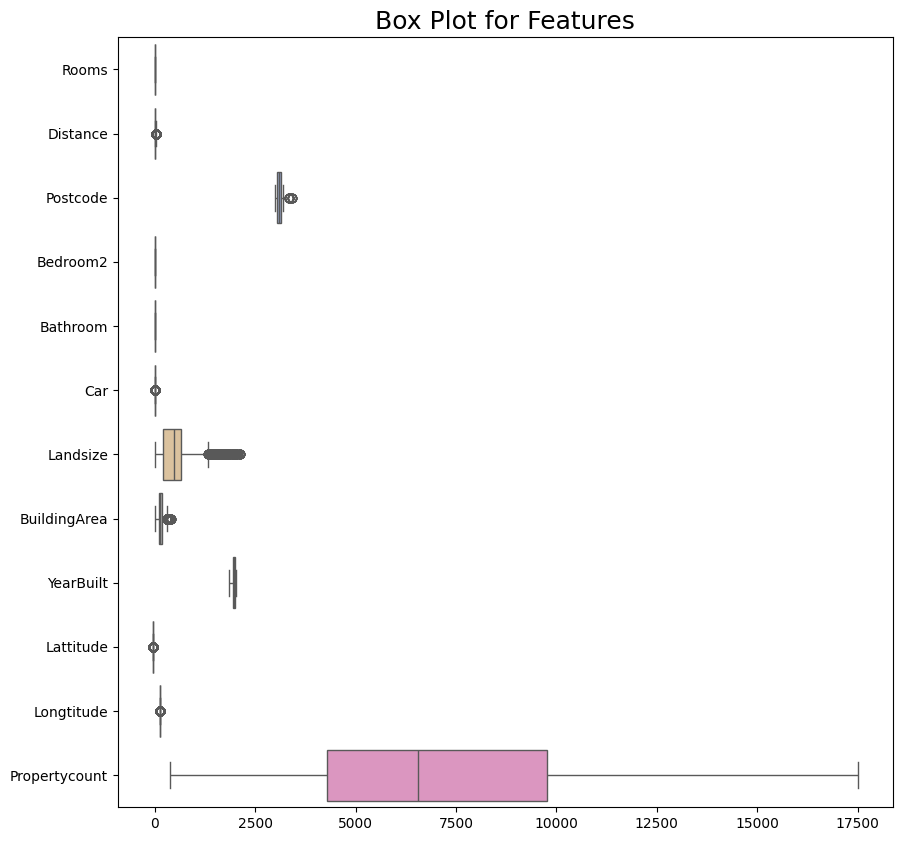

In [25]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=df_cleaned.drop(['Date', 'Price'],axis=1), orient="h", palette="Set2")
print(df_cleaned.drop(['Date', 'Price'],axis=1).describe())

#### NaN, Missing Values

In [26]:
train_missing_values = df_cleaned.isnull().sum()
train_missing_values

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6890
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7717
Bathroom          7726
Car               8191
Landsize         10878
BuildingArea     19361
YearBuilt        17651
CouncilArea          3
Lattitude         7500
Longtitude        7500
Regionname           3
Propertycount        3
dtype: int64

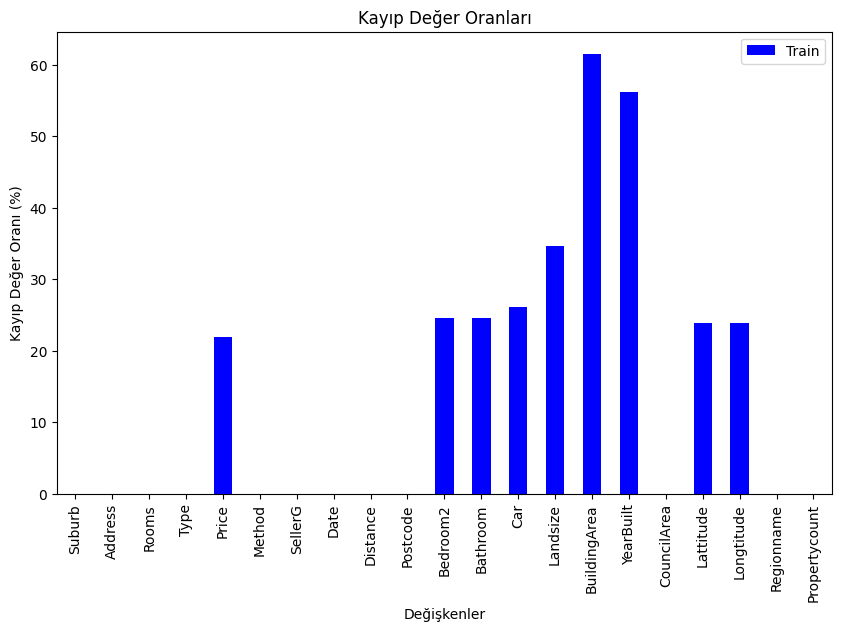

In [27]:
# Calculate missing value rates
train_missing_percent = (train_missing_values / len(df_cleaned)) * 100

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

train_missing_percent.plot(kind='bar', color='blue', label='Train')

plt.title('Kayıp Değer Oranları')
plt.xlabel('Değişkenler')
plt.ylabel('Kayıp Değer Oranı (%)')
plt.legend()
plt.show()

Price, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount değişkenlerinde boş değerler bulunmaktadır. En fazla kayıp BuildingArea değişkenindedir.

In [28]:
df_cleaned

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
31449  Yarraville         13 Burns St      4    h  1480000.0     PI   
31450  Yarraville       29A Murray St      2    h   888000.0     SP   
31451  Yarraville      147A Severn St      2    t   705000.0      S   
31452  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
31453  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG       Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis 2016-09-03       2.5    3067.0  ...       1.0  1.0   
1             Biggin 2016-12-03       2.5    3067.0  ...       1.0  1.0   
2             Biggin 2016-02-04       2.5    3067.0  ...       1.0  0.0   
3             Rounds 2016-02-04       2.5    3067.0  ...       2.0  1.0   
4             Biggin 2017-03-04       2.5    3067.0  ...       2.0  0.0   
...              ...        ...       ...       ...  ...       ...  ...   
31449            Jas 2018-02-24       6.3    3013.0  ...       1.0  3.0   
31450        Sweeney 2018-02-24       6.3    3013.0  ...       2.0  1.0   
31451            Jas 2018-02-24       6.3    3013.0  ...       1.0  2.0   
31452  hockingstuart 2018-02-24       6.3    3013.0  ...       NaN  NaN   
31453             RW 2018-02-24       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
31449     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
31450      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
31451     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
31452       NaN           NaN        NaN  Maribyrnong City Council       NaN   
31453     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
31449   144.88467   Western Metropolitan        6543.0  
31450   144.88826   Western Metropolitan        6543.0  
31451   144.87856   Western Metropolitan        6543.0  
31452         NaN   Western Metropolitan        6543.0  
31453   144.89351   Western Metropolitan        6543.0  

[31454 rows x 21 columns]

In [29]:
for column in cat_cols:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode().iloc[0])

In [30]:
for column in num_cols:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mean())

In [31]:
df_cleaned

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
31449  Yarraville         13 Burns St      4    h  1480000.0     PI   
31450  Yarraville       29A Murray St      2    h   888000.0     SP   
31451  Yarraville      147A Severn St      2    t   705000.0      S   
31452  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
31453  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG       Date  Distance  Postcode  ...  Bathroom       Car  \
0             Jellis 2016-09-03       2.5    3067.0  ...  1.000000  1.000000   
1             Biggin 2016-12-03       2.5    3067.0  ...  1.000000  1.000000   
2             Biggin 2016-02-04       2.5    3067.0  ...  1.000000  0.000000   
3             Rounds 2016-02-04       2.5    3067.0  ...  2.000000  1.000000   
4             Biggin 2017-03-04       2.5    3067.0  ...  2.000000  0.000000   
...              ...        ...       ...       ...  ...       ...       ...   
31449            Jas 2018-02-24       6.3    3013.0  ...  1.000000  3.000000   
31450        Sweeney 2018-02-24       6.3    3013.0  ...  2.000000  1.000000   
31451            Jas 2018-02-24       6.3    3013.0  ...  1.000000  2.000000   
31452  hockingstuart 2018-02-24       6.3    3013.0  ...  1.571477  1.640717   
31453             RW 2018-02-24       6.3    3013.0  ...  1.000000  0.000000   

         Landsize  BuildingArea    YearBuilt               CouncilArea  \
0      126.000000      145.6195  1963.494458        Yarra City Council   
1      202.000000      145.6195  1963.494458        Yarra City Council   
2      156.000000       79.0000  1900.000000        Yarra City Council   
3        0.000000      145.6195  1963.494458        Yarra City Council   
4      134.000000      150.0000  1900.000000        Yarra City Council   
...           ...           ...          ...                       ...   
31449  593.000000      145.6195  1963.494458  Maribyrnong City Council   
31450   98.000000      104.0000  2018.000000  Maribyrnong City Council   
31451  220.000000      120.0000  2000.000000  Maribyrnong City Council   
31452  453.786936      145.6195  1963.494458  Maribyrnong City Council   
31453  250.000000      103.0000  1930.000000  Maribyrnong City Council   

       Lattitude  Longtitude             Regionname Propertycount  
0     -37.801400  144.995800  Northern Metropolitan        4019.0  
1     -37.799600  144.998400  Northern Metropolitan        4019.0  
2     -37.807900  144.993400  Northern Metropolitan        4019.0  
3     -37.811400  145.011600  Northern Metropolitan        4019.0  
4     -37.809300  144.994400  Northern Metropolitan        4019.0  
...          ...         ...                    ...           ...  
31449 -37.810530  144.884670   Western Metropolitan        6543.0  
31450 -37.815510  144.888260   Western Metropolitan        6543.0  
31451 -37.822860  144.878560   Western Metropolitan        6543.0  
31452 -37.812597  145.002686   Western Metropolitan        6543.0  
31453 -37.818100  144.893510   Western Metropolitan        6543.0  

[31454 rows x 21 columns]

In [32]:
train_missing_values = df_cleaned.isnull().sum()
train_missing_values

Suburb              0
Address             0
Rooms               0
Type                0
Price            6890
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Data Visualization

#### Price Distribution

<Axes: xlabel='Price', ylabel='Count'>

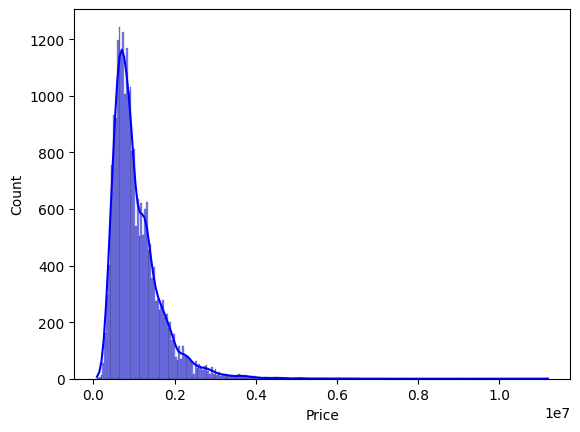

In [33]:
# Creates histogram to see price distribution
sns.histplot(data=df_cleaned["Price"], kde=True, color="blue" )

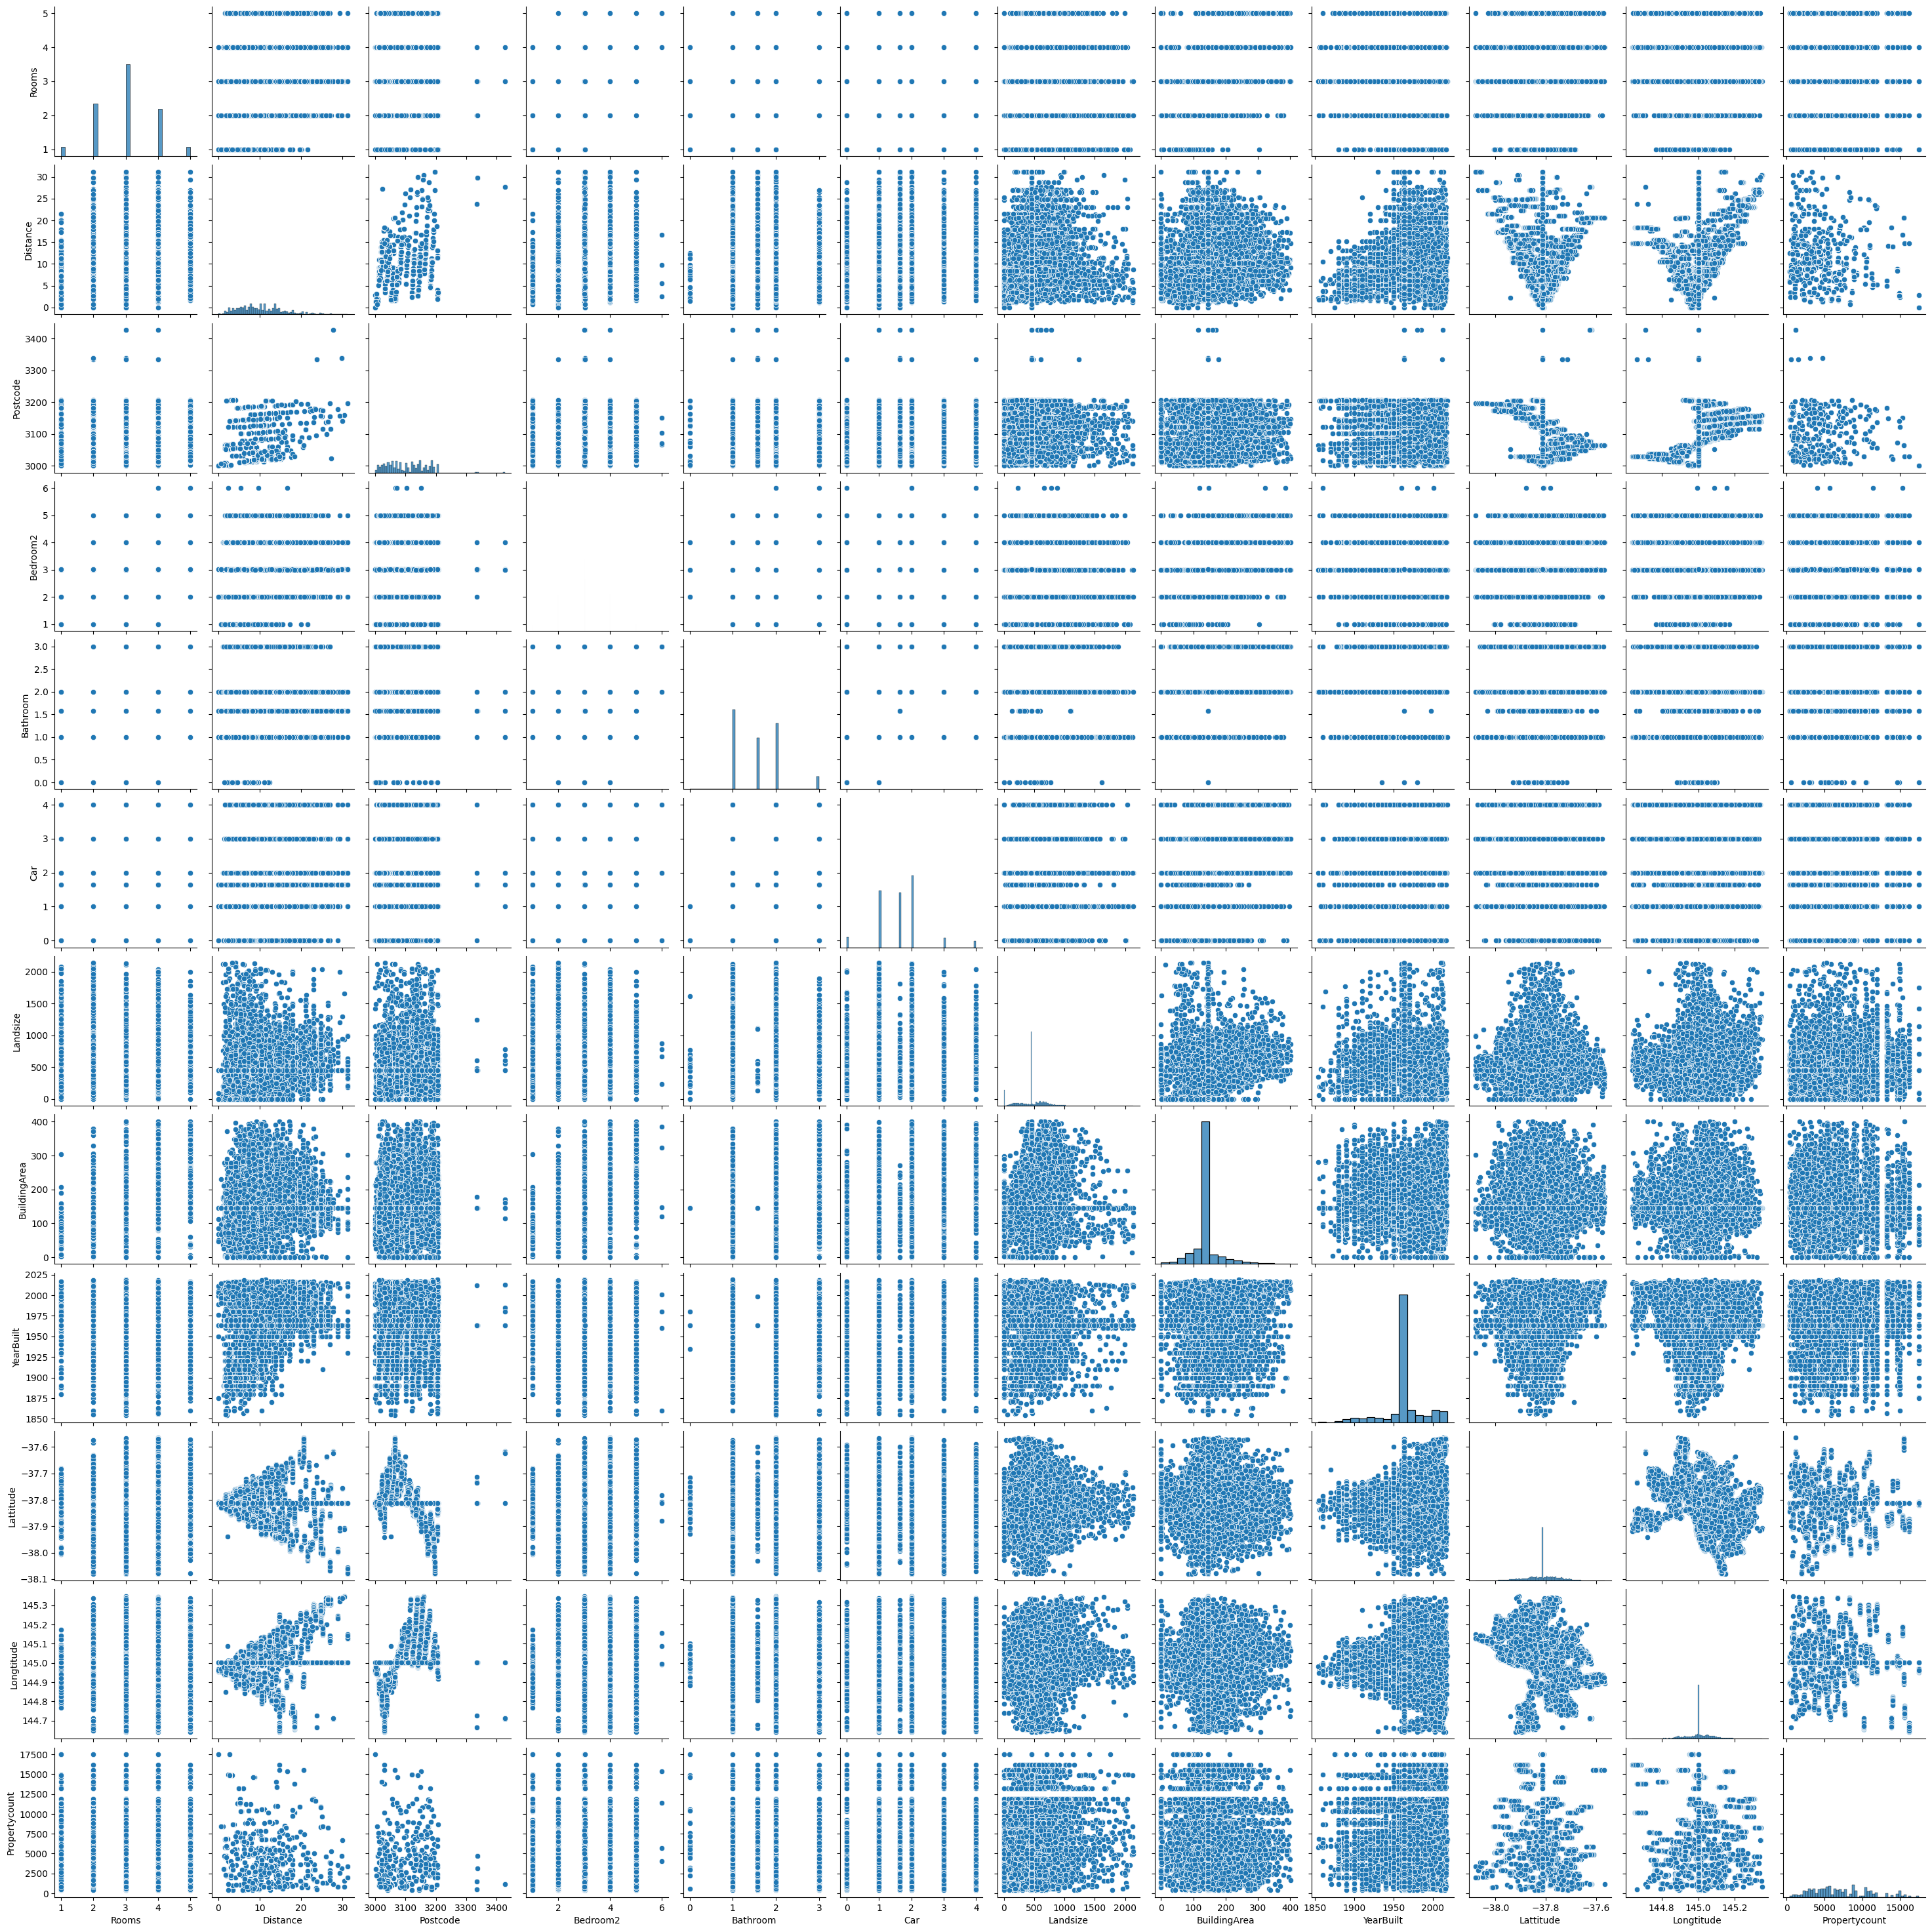

In [34]:
# Create a pair plot
sns.pairplot(df_cleaned[num_cols])
# Show the plot
plt.show()

#### Exporting Correlation Matrix

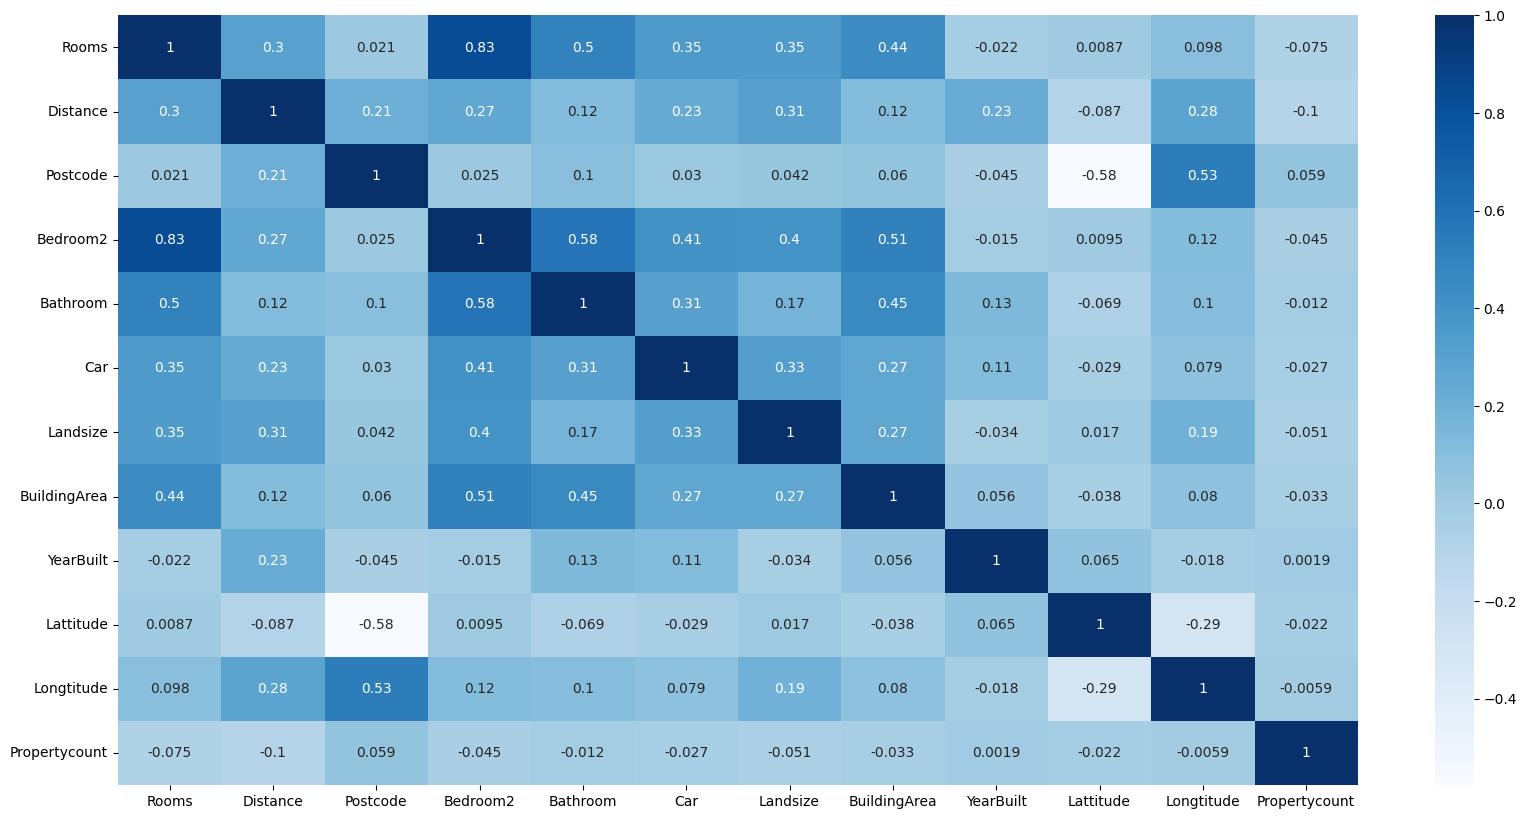

In [35]:
corr = df_cleaned[num_cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

"Rooms", "Bedroom2" ve "Bathroom" değişkenleri ile hedef değişkenimiz olan Price ile orta düzeyde pozitif korelasyon ilişkisi bulunmaktadır. Bu durum bir mülkteki oda sayısı arttıkça fiyatın artma eğiliminde olduğunu göstermektedir. 
Ayrıca "BuildingArea" değişkeni ile Price arasında da pozitif korelasyon ilişkisi vardır. Bu durum ise daha büyük inşaat alanına sahip mülklerin daha yüksek fiyatlara sahip olma eğiliminde olduğunu gösterir.

#### Encoding and Scaling

In [36]:
# Step 1: Label Encoding (for ordinal categorical variables)
label_encoder = LabelEncoder()

for col in cat_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [37]:
# # Step 2: One-Hot Encoding (for nominal categorical variables)
# # Create a new DataFrame for one-hot encoded variables
# df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols, prefix=cat_cols)

In [38]:
scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [39]:
train_data = df_cleaned
train_data

Suburb  Address     Rooms  Type      Price  Method  SellerG       Date  \
0           0    26619 -1.070889     0        NaN       6      144 2016-09-03   
1           0    29387 -1.070889     0  1480000.0       2       29 2016-12-03   
2           0    13907 -1.070889     0  1035000.0       2       29 2016-02-04   
3           0     8777  0.029527     2        NaN       7      269 2016-02-04   
4           0    22727  0.029527     0  1465000.0       5       29 2017-03-04   
...       ...      ...       ...   ...        ...     ...      ...        ...   
31449     287     5295  1.129944     0  1480000.0       0      141 2018-02-24   
31450     287    15342 -1.070889     0   888000.0       5      291 2018-02-24   
31451     287     6604 -1.070889     1   705000.0       2      141 2018-02-24   
31452     287     4895  0.029527     0  1140000.0       5      336 2018-02-24   
31453     287    16023 -1.070889     0  1020000.0       0      250 2018-02-24   

       Distance  Postcode  ...      Bathroom       Car      Landsize  \
0     -1.438690 -0.581218  ... -1.032561e+00 -0.872626 -1.313945e+00   
1     -1.438690 -0.581218  ... -1.032561e+00 -0.872626 -1.009296e+00   
2     -1.438690 -0.581218  ... -1.032561e+00 -2.234579 -1.193689e+00   
3     -1.438690 -0.581218  ...  7.742684e-01 -0.872626 -1.819020e+00   
4     -1.438690 -0.581218  ...  7.742684e-01 -2.234579 -1.281876e+00   
...         ...       ...  ...           ...       ...           ...   
31449 -0.743714 -1.476783  ... -1.032561e+00  1.851279  5.580401e-01   
31450 -0.743714 -1.476783  ...  7.742684e-01 -0.872626 -1.426183e+00   
31451 -0.743714 -1.476783  ... -1.032561e+00  0.489326 -9.371425e-01   
31452 -0.743714 -1.476783  ...  4.011967e-16  0.000000  2.278587e-16   
31453 -0.743714 -1.476783  ... -1.032561e+00 -2.234579 -8.168865e-01   

       BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  \
0     -6.761817e-16   0.000000           26   0.165054   -0.072183   
1     -6.761817e-16   0.000000           26   0.191587   -0.044930   
2     -1.584947e+00  -2.588981           26   0.069242   -0.097340   
3     -6.761817e-16   0.000000           26   0.017651    0.093434   
4      1.042166e-01  -2.588981           26   0.048606   -0.086858   
...             ...        ...          ...        ...         ...   
31449 -6.761817e-16   0.000000           13   0.030475   -1.237054   
31450 -9.901708e-01   2.222459           13  -0.042931   -1.199423   
31451 -6.095143e-01   1.488510           13  -0.151272   -1.301099   
31452 -6.761817e-16   0.000000           13   0.000000    0.000000   
31453 -1.013962e+00  -1.365734           13  -0.081109   -1.144393   

       Regionname  Propertycount  
0               2      -0.821933  
1               2      -0.821933  
2               2      -0.821933  
3               2      -0.821933  
4               2      -0.821933  
...           ...            ...  
31449           6      -0.161018  
31450           6      -0.161018  
31451           6      -0.161018  
31452           6      -0.161018  
31453           6      -0.161018  

[31454 rows x 21 columns]

             Suburb         Rooms          Type        Method       SellerG  \
count  31454.000000  3.145400e+04  31454.000000  31454.000000  31454.000000   
mean     139.019743  3.614384e-17      0.544096      2.715775    166.567082   
std       81.606787  1.000016e+00      0.826975      1.985329    100.236473   
min        0.000000 -2.171306e+00      0.000000      0.000000      0.000000   
25%       63.000000 -1.070889e+00      0.000000      2.000000     87.000000   
50%      136.000000  2.952730e-02      0.000000      2.000000    173.000000   
75%      210.000000  1.129944e+00      1.000000      4.000000    249.000000   
max      289.000000  2.230361e+00      2.000000      8.000000    353.000000   

           Distance      Postcode      Bedroom2      Bathroom           Car  \
count  3.145400e+04  3.145400e+04  3.145400e+04  3.145400e+04  3.145400e+04   
mean  -3.975823e-16 -2.280676e-15 -5.060138e-17  2.746932e-16  3.614384e-17   
std    1.000016e+00  1.000016e+00  1.000016e+00  1.

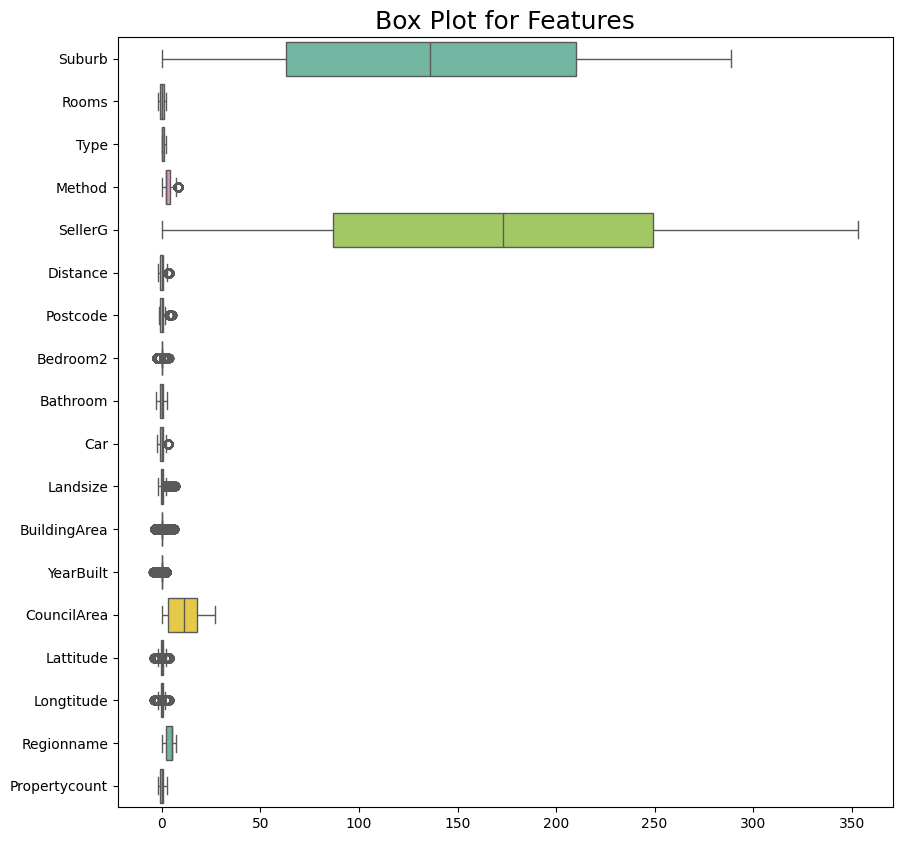

In [40]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=train_data.drop(['Address','Date','Price'],axis=1), orient="h", palette="Set2")
print(train_data.drop(['Address','Date','Price'],axis=1).describe())

In [41]:
scaler = MinMaxScaler()
columns = ['Suburb','SellerG', 'CouncilArea']
scaler.fit(np.array(train_data[columns]))
train_data[columns] = scaler.transform(np.array(train_data[columns]))

             Suburb         Rooms          Type        Method       SellerG  \
count  31454.000000  3.145400e+04  31454.000000  31454.000000  31454.000000   
mean       0.481037  3.614384e-17      0.544096      2.715775      0.471861   
std        0.282376  1.000016e+00      0.826975      1.985329      0.283956   
min        0.000000 -2.171306e+00      0.000000      0.000000      0.000000   
25%        0.217993 -1.070889e+00      0.000000      2.000000      0.246459   
50%        0.470588  2.952730e-02      0.000000      2.000000      0.490085   
75%        0.726644  1.129944e+00      1.000000      4.000000      0.705382   
max        1.000000  2.230361e+00      2.000000      8.000000      1.000000   

           Distance      Postcode      Bedroom2      Bathroom           Car  \
count  3.145400e+04  3.145400e+04  3.145400e+04  3.145400e+04  3.145400e+04   
mean  -3.975823e-16 -2.280676e-15 -5.060138e-17  2.746932e-16  3.614384e-17   
std    1.000016e+00  1.000016e+00  1.000016e+00  1.

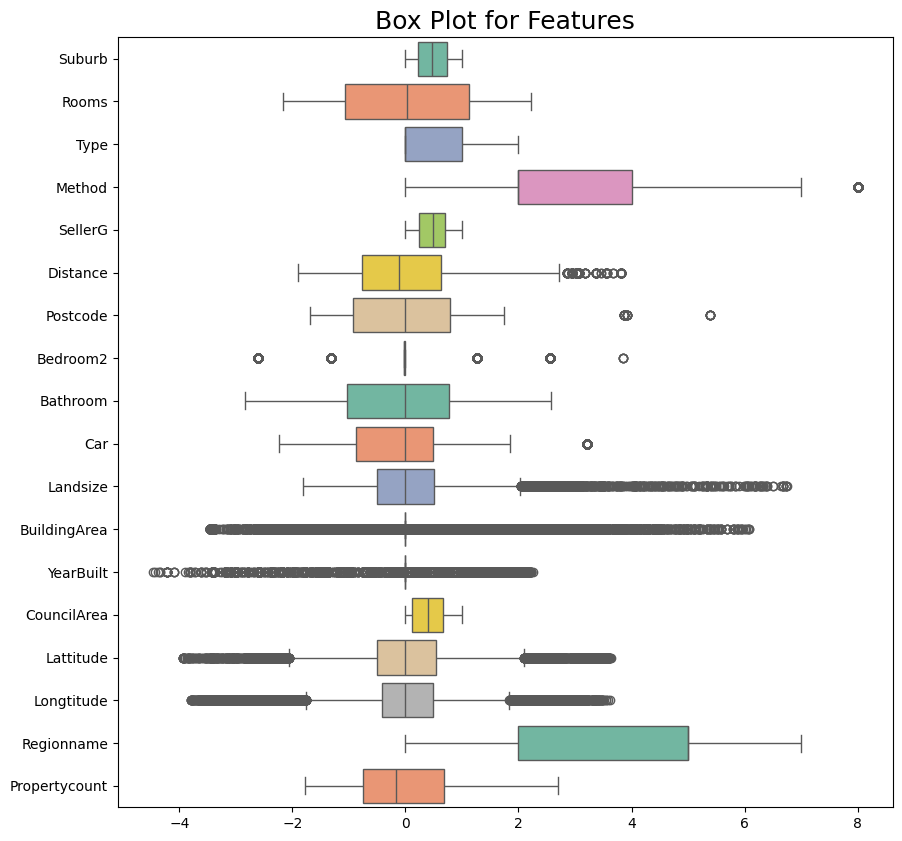

In [42]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=train_data.drop(['Address','Date','Price'],axis=1), orient="h", palette="Set2")
print(train_data.drop(['Address','Date','Price'],axis=1).describe())

## Model Selection

In [43]:
X = train_data.drop(['Address','Date','Price','Bedroom2','BuildingArea','YearBuilt'], axis=1)  # Adjust this based on your data
y = train_data['Price']  # Adjust this based on your data

# Split the dataset into train and test sets with 67-33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (21074, 15)
Shape of x_test is (10380, 15)
Shape of y_train is (21074,)
Shape of y_test is (10380,)


In [45]:
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

In [46]:
# Price sütununda eksik değerleri çıkart
train_df = train_data.dropna(subset=['Price'])
train_df

Suburb  Address     Rooms  Type      Price  Method   SellerG  \
1      0.00000    29387 -1.070889     0  1480000.0       2  0.082153   
2      0.00000    13907 -1.070889     0  1035000.0       2  0.082153   
4      0.00000    22727  0.029527     0  1465000.0       5  0.082153   
5      0.00000    21013  0.029527     0   850000.0       0  0.082153   
6      0.00000    24499  1.129944     0  1600000.0       7  0.586402   
...        ...      ...       ...   ...        ...     ...       ...   
31449  0.99308     5295  1.129944     0  1480000.0       0  0.399433   
31450  0.99308    15342 -1.070889     0   888000.0       5  0.824363   
31451  0.99308     6604 -1.070889     1   705000.0       2  0.399433   
31452  0.99308     4895  0.029527     0  1140000.0       5  0.951841   
31453  0.99308    16023 -1.070889     0  1020000.0       0  0.708215   

            Date  Distance  Postcode  ...      Bathroom       Car  \
1     2016-12-03 -1.438690 -0.581218  ... -1.032561e+00 -0.872626   
2     2016-02-04 -1.438690 -0.581218  ... -1.032561e+00 -2.234579   
4     2017-03-04 -1.438690 -0.581218  ...  7.742684e-01 -2.234579   
5     2017-03-04 -1.438690 -0.581218  ...  7.742684e-01 -0.872626   
6     2016-06-04 -1.438690 -0.581218  ... -1.032561e+00  0.489326   
...          ...       ...       ...  ...           ...       ...   
31449 2018-02-24 -0.743714 -1.476783  ... -1.032561e+00  1.851279   
31450 2018-02-24 -0.743714 -1.476783  ...  7.742684e-01 -0.872626   
31451 2018-02-24 -0.743714 -1.476783  ... -1.032561e+00  0.489326   
31452 2018-02-24 -0.743714 -1.476783  ...  4.011967e-16  0.000000   
31453 2018-02-24 -0.743714 -1.476783  ... -1.032561e+00 -2.234579   

           Landsize  BuildingArea  YearBuilt  CouncilArea  Lattitude  \
1     -1.009296e+00 -6.761817e-16   0.000000     0.962963   0.191587   
2     -1.193689e+00 -1.584947e+00  -2.588981     0.962963   0.069242   
4     -1.281876e+00  1.042166e-01  -2.588981     0.962963   0.048606   
5     -1.442218e+00 -6.761817e-16   0.000000     0.962963   0.231385   
6     -1.337996e+00 -8.611164e-02   2.059359     0.962963   0.079560   
...             ...           ...        ...          ...        ...   
31449  5.580401e-01 -6.761817e-16   0.000000     0.481481   0.030475   
31450 -1.426183e+00 -9.901708e-01   2.222459     0.481481  -0.042931   
31451 -9.371425e-01 -6.095143e-01   1.488510     0.481481  -0.151272   
31452  2.278587e-16 -6.761817e-16   0.000000     0.481481   0.000000   
31453 -8.168865e-01 -1.013962e+00  -1.365734     0.481481  -0.081109   

       Longtitude  Regionname  Propertycount  
1       -0.044930           2      -0.821933  
2       -0.097340           2      -0.821933  
4       -0.086858           2      -0.821933  
5       -0.060653           2      -0.821933  
6       -0.090002           2      -0.821933  
...           ...         ...            ...  
31449   -1.237054           6      -0.161018  
31450   -1.199423           6      -0.161018  
31451   -1.301099           6      -0.161018  
31452    0.000000           6      -0.161018  
31453   -1.144393           6      -0.161018  

[24564 rows x 21 columns]

In [47]:
X = train_df.drop(['Address','Date','Price','Bedroom2','BuildingArea','YearBuilt'], axis=1)
y = train_df['Price']
# Split the dataset into train and test sets with 67-33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Evaluation

In [48]:
# Create dictionaries to store the evaluation metrics for each model
mae_scores = {}
mse_scores = {}
rmse_scores = {}
r2_scores = {}

# Loop through the models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model with the training data

    y_pred = model.predict(X_test)  # Make predictions on the test data
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[model_name] = mae
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse
    
    # Calculate RMSE
    rmse = np.sqrt(mse)
    rmse_scores[model_name] = rmse
    
    # Calculate R2
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

# Find the best performing model based on R2
best_model = max(r2_scores, key=r2_scores.get)

# Print the evaluation metrics for each model
for model_name in models:
    print(f"{model_name}:")
    print(f"MAE: {mae_scores[model_name]}")
    print(f"MSE: {mse_scores[model_name]}")
    print(f"RMSE: {rmse_scores[model_name]}")
    print(f"R2: {r2_scores[model_name]}")
    print("\n")

# Print the best performing model
print(f"The best performing model is {best_model} with an R2 score of {r2_scores[best_model]}")

Lasso:
MAE: 269592.85090353165
MSE: 171335824632.37234
RMSE: 413927.31805520196
R2: 0.5647277538710792


LinearRegression:
MAE: 269593.23813292733
MSE: 171335620216.52
RMSE: 413927.0711327298
R2: 0.564728273181897


Ridge:
MAE: 269589.11118785344
MSE: 171336735910.96902
RMSE: 413928.41882500536
R2: 0.5647254388019307


ElasticNet:
MAE: 287225.114832928
MSE: 203687231730.17438
RMSE: 451317.2185172801
R2: 0.4825402156658858


KNeighborsRegressor:
MAE: 213074.58416183543
MSE: 129089829843.077
RMSE: 359290.7316409331
R2: 0.6720521215644245


RandomForestRegressor:
MAE: 179074.83639524155
MSE: 99712336498.82228
RMSE: 315772.6025145663
R2: 0.7466845432487286


GradientBoostingRegressor:
MAE: 192249.23135190102
MSE: 107136541298.23381
RMSE: 327317.1875997865
R2: 0.7278236289846232


AdaBoostRegressor:
MAE: 457801.6614991604
MSE: 312338883210.24774
RMSE: 558872.8685580002
R2: 0.20651476397285662


The best performing model is RandomForestRegressor with an R2 score of 0.7466845432487286


## Compare Models

The best performing model is RandomForestRegressor with an R2 score of 0.7466845432487286


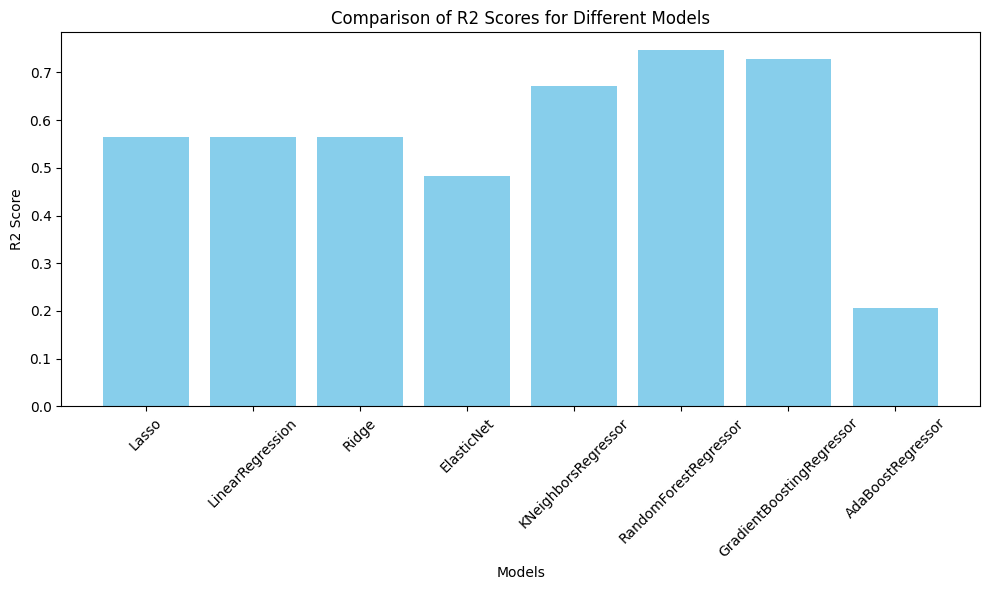

In [49]:
# Create a bar chart to compare R2 scores
model_names = list(models.keys())
r2_values = [r2_scores[model_name] for model_name in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

# Print the best performing model
print(f"The best performing model is {best_model} with an R2 score of {r2_scores[best_model]}")

# Show the bar chart
plt.show()

Test ettiğimiz farklı modeller arasında RandomForestRegressor modeli en yüksek R^2 puanına sahip model olarak öne çıkıyor. Bu, modelin verilerdeki varyansı diğer modellere göre daha fazla açıklayabildiği anlamına gelir. Dolayısıyla RandomForestRegressor modelinin verilere daha iyi uyum sağladığı ve analizimize daha uygun olduğu sonucuna varıyoruz.

Kök Ortalama Karesel Hatanın (Root Mean Squared Error(RMSE)) düşük olması, modelin tahminlerinin gerçek değerlere daha yakın olduğunu gösterir; RandomForestRegressor en iyisidir.

In [50]:
# Save Best Model
joblib.dump(best_model, 'best_model.pkl')

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!
